<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/random_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL
import shutil
import os
import torch
import torchvision
import numpy as np

In [7]:
image_pathes = []
for path, _, files in os.walk('/content/drive/MyDrive/seol/datasets/img256'):
    for file_path in files:
        image_pathes.append(os.path.join(path, file_path))

image_pathes[:5]

['/content/drive/MyDrive/seol/datasets/img256/img001.png',
 '/content/drive/MyDrive/seol/datasets/img256/img002.png',
 '/content/drive/MyDrive/seol/datasets/img256/img003.png',
 '/content/drive/MyDrive/seol/datasets/img256/img004.png',
 '/content/drive/MyDrive/seol/datasets/img256/img006.png']

PIL:                 (240, 180)
PIL->Numpy:          (180, 240, 3)
PIL->tensor:         torch.Size([3, 180, 240])
PIL->tensor->Numpy:  (3, 180, 240)
PIL->tensor->PIL:    torch.Size([3, 180, 240])


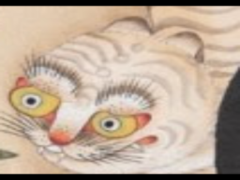

In [9]:
from torchvision.transforms.functional import to_pil_image

def pil_to_tensor(pil_image):
    # PIL: [width, height]
    # -> NumPy: [height, width, channel]
    # -> Tensor: [channel, height, width]
    return torch.as_tensor(np.asarray(pil_image)).permute(2,0,1)

def tensor_to_pil(tensor_image):
    return to_pil_image(tensor_image)

def tensor_to_pltimg(tensor_image):
    return tensor_image.permute(1,2,0).numpy()

pil_image = PIL.Image.open(image_pathes[0]) # (150, 150)

# Tilt size for check where width/height be
pil_image = torchvision.transforms.Resize((180, 240))(pil_image)

print('PIL:                ', pil_image.size)
print('PIL->Numpy:         ', np.array(pil_image).shape)
print('PIL->tensor:        ', pil_to_tensor(pil_image).shape)
print('PIL->tensor->Numpy: ', np.array(pil_to_tensor(pil_image)).shape)
print('PIL->tensor->PIL:   ', pil_to_tensor(tensor_to_pil(pil_to_tensor(pil_image))).shape)
tensor_to_pil(pil_to_tensor(pil_image))

In [31]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

def make_sample_grid_with_transforms(tf, image_path,idx):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        pil_image = PIL.Image.open(image_path) # shape: (300, 200)

        applied_image = tf(pil_to_tensor(pil_image))

        plt.subplot(3, 3, i+1)

        img=tensor_to_pltimg(applied_image)
        img2 = PIL.Image.fromarray(img)
        img2.save("/content/drive/MyDrive/seol/test/crop/img%d-%d.png"%(idx,i+1))

        plt.imshow(tensor_to_pltimg(applied_image))

        plt.axis("off")
    plt.show()

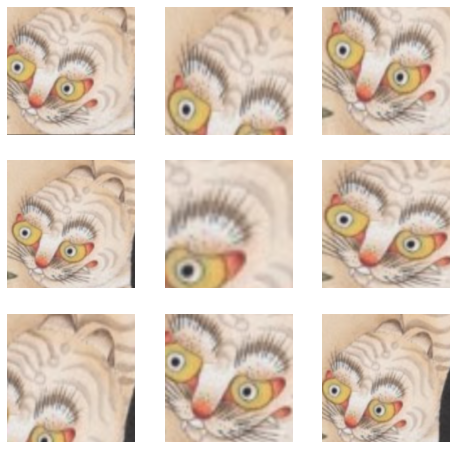

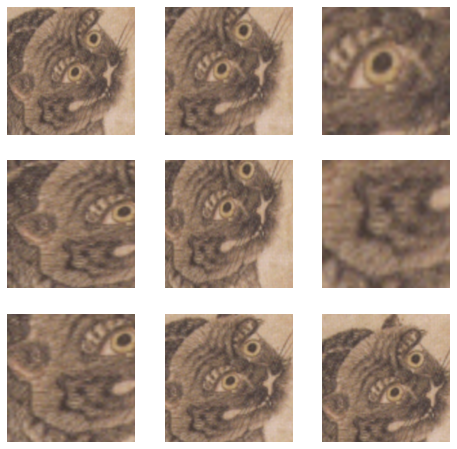

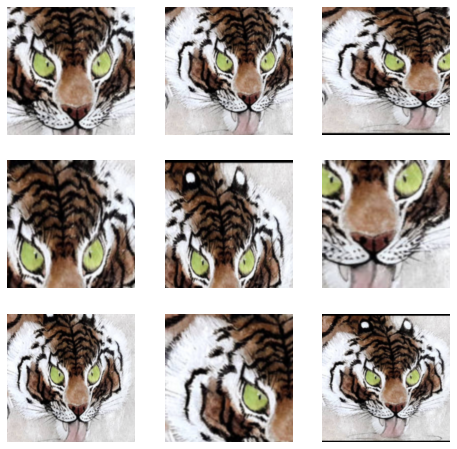

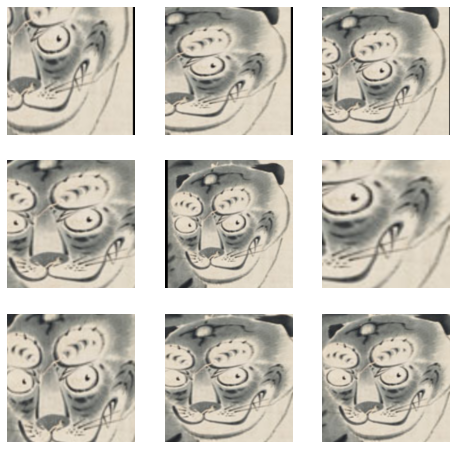

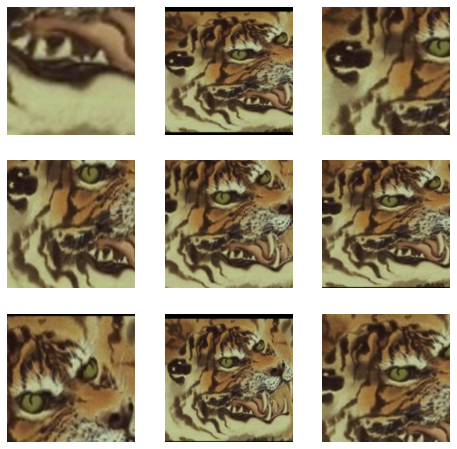

In [32]:
transform = transforms.RandomResizedCrop((256, 256))

for i in range(0,750):
  make_sample_grid_with_transforms(transform, image_pathes[i],i)